<a href="https://colab.research.google.com/github/samsharm/Python/blob/master/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
np.random.seed(1337)                                                # just a random number seed for reproducibility
X = np.linspace(-1, 1, 200)                                         # create 200 x values between [-1,1]
np.random.shuffle(X)                                                # randomize the data
y = 2 * X + np.random.randn(*X.shape) * 0.33                        # create 200 y values randomized by the seed

In [6]:
print (X)
print (y)

[-0.70854271  0.1758794  -0.30653266  0.74874372 -0.02512563  0.33668342
 -0.85929648  0.01507538 -0.13567839  0.72864322  0.24623116 -0.74874372
 -0.78894472  0.50753769  0.03517588  0.35678392 -0.55778894  0.2361809
 -0.25628141 -0.44723618  0.2160804  -0.43718593 -0.64824121  0.69849246
 -0.03517588 -0.45728643  0.86934673  0.73869347  0.53768844 -0.67839196
 -0.75879397  0.55778894  0.28643216 -0.05527638 -0.86934673  0.1959799
 -0.57788945 -0.9798995  -0.6080402  -0.63819095  0.84924623  0.41708543
  0.13567839  0.79899497 -0.47738693  0.46733668  0.59798995 -0.80904523
 -0.98994975 -0.36683417 -0.5678392  -0.00502513 -0.53768844 -0.37688442
 -0.65829146 -0.1959799   0.06532663  0.44723618 -0.01507538 -0.6281407
  0.02512563 -0.71859296 -0.14572864 -0.46733668  0.07537688  0.85929648
  0.76884422  0.40703518 -0.68844221  0.68844221 -0.29648241  0.66834171
 -0.95979899 -0.33668342  0.26633166 -0.82914573  1.         -0.5879397
 -0.69849246 -0.20603015  0.63819095 -0.88944724 -0.407

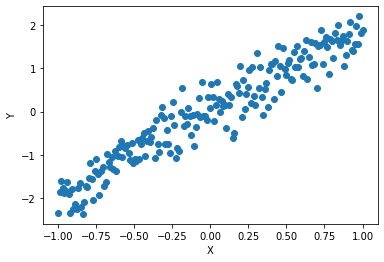

In [7]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [8]:
# train test split
X_train, y_train = X[:160], y[:160]     #split train:test in 160:40
X_test, y_test = X[160:], y[160:] 

In [9]:
model = Sequential()
model.add(Dense(input_dim=1, units=1, kernel_initializer='uniform', activation='linear'))

In [10]:
model.compile(loss='mse', optimizer='sgd')  #MEan Square Error and Stochastic Gradient Descent

In [11]:
weights = model.layers[0].get_weights()
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weight w: %.2f, b: %.2f' % (w_init, b_init))

Linear regression model is initialized with weight w: 0.01, b: 0.00


In [12]:
#Train the model now
# First way
model.fit(X_train, y_train, epochs=100, verbose=1) 

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 1.3814
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 1.2815
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 1.2353
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 1.1615
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0088
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9219
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 0.9677
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8146
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 0.8599
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7899
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7177
Epoch 12/100
5/5 [==============================] - 0s 1ms/step - loss: 0.6916
Epoch 13/100
5/5 [==============================] - 0s 1ms/st

In [13]:
# Second way
for step in range(101):
    cost = model.train_on_batch(X_train, y_train)
    if step % 10 == 0:
        print('train cost: ', cost)

train cost:  0.11561539024114609
train cost:  0.11536522209644318
train cost:  0.11521470546722412
train cost:  0.1150834783911705
train cost:  0.11496905982494354
train cost:  0.11486927419900894
train cost:  0.11478225886821747
train cost:  0.1147063747048378
train cost:  0.11464021354913712
train cost:  0.11458253860473633
train cost:  0.1145322173833847


In [17]:
#Evaluate the model now
print('\nTesting ------------')
cost = model.evaluate(X_test, y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)


Testing ------------
1/1 [==============================] - 0s 12ms/step - loss: 0.1404
test cost: 0.1403825283050537
Weights= [[1.9114959]] 
biases= [0.02608185]


ValueError: ignored

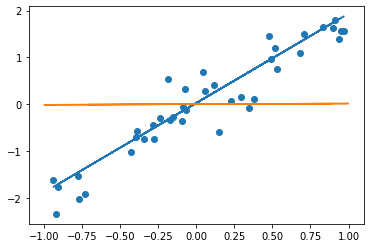

In [19]:
#Plotting the prediction
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.plot(X_train, w_init*X_train + b_init, label='initial')
plt.plot(X_test, W*X_test + b, label='prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Linear Regression")
plt.legend()
plt.show()